<a href="https://colab.research.google.com/github/ramakalidass2/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of dataset: (20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Top correlated features:
 ['MedInc', 'AveRooms', 'HouseAge', 'AveOccup', 'Population']
MAE: 0.6015701115985254
MSE: 0.6561369372393887
RMSE: 0.8100228004441533
R² Score: 0.4992884296930027


Text(0.5, 1.0, 'Actual vs Predicted House Prices')

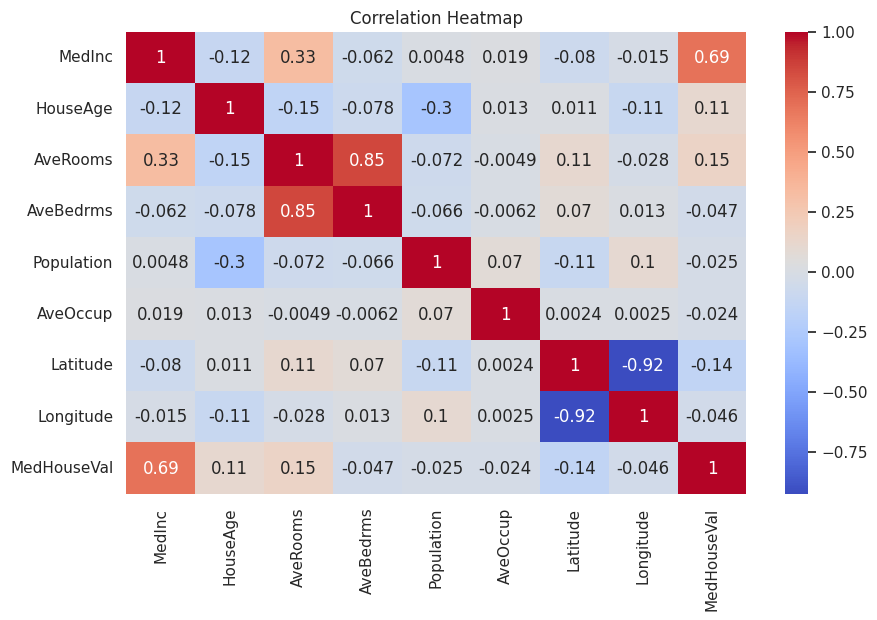

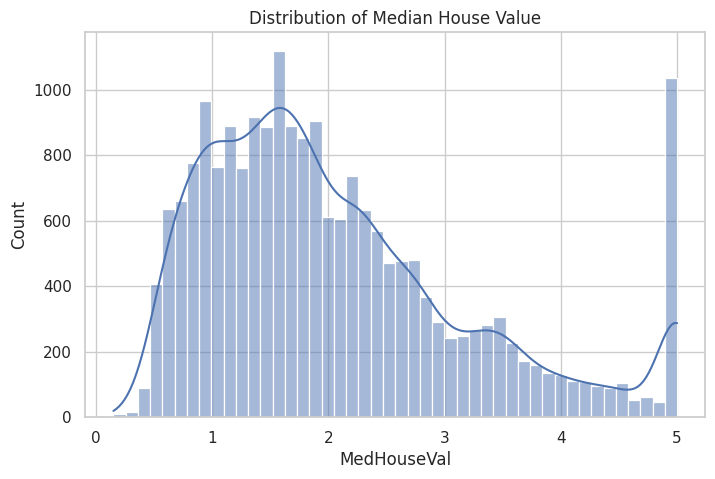

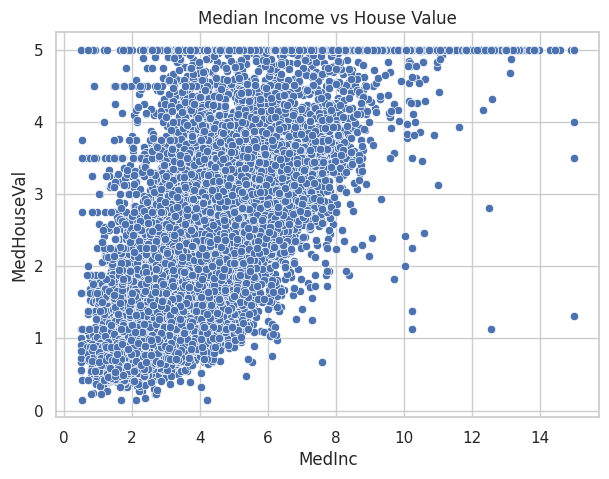

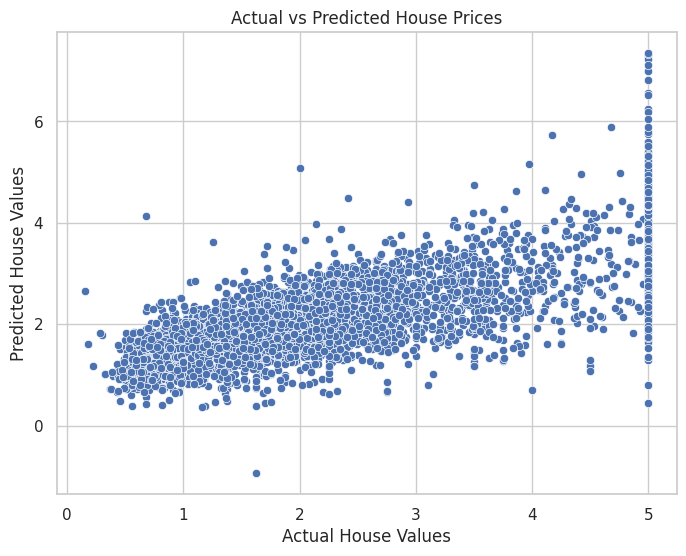

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="whitegrid")

#Load Housing Dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

#Initial Exploration
print("Shape of dataset:", df.shape)
df.head()
df.info()
df.describe()

#EDA - Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

#Target Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title("Distribution of Median House Value")

#Feature vs. Target
plt.figure(figsize=(7,5))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)
plt.title("Median Income vs House Value")

#Feature Selection
correlation = df.corr()['MedHouseVal'].sort_values(ascending=False)
top_features = correlation[1:6].index.tolist()
print("Top correlated features:\n", top_features)

#Train-Test Split
X = df[top_features]
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

#Evaluate the Model
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

#Actual vs Predicted Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual House Values")
plt.ylabel("Predicted House Values")
plt.title("Actual vs Predicted House Prices")